# One Hot Encoding


In [1]:
import os
import mglearn
import pandas as pd
adult_path = os.path.join(mglearn.datasets.DATA_PATH,'adult.data')
data = pd.read_csv(adult_path,header=None,index_col=False, names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','gender','capital-gain','capital-loss','hours-per-week','native-country','income'])
data = data[['age','workclass','education','gender','hours-per-week','occupation','income']]
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [2]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [3]:
print("Original features:\n",list(data.columns),"\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n",list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [4]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [5]:
features = data_dummies.loc[:,'age':'occupation_ Transport-moving']
X= features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {} y.shape: {}".format(X.shape,y.shape))

X.shape: (32561, 44) y.shape: (32561,)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print("Test score: {:.2f}".format(logreg.score(X_test,y_test)))

Test score: 0.81


C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
demo_df = pd.DataFrame({'Integer Feature':[0,1,2,1],'Categorical Feature':['stocks','fox','socks','box']})
display(demo_df)

,Integer Feature,Categorical Feature
0,0,stocks
1,1,fox
2,2,socks
3,1,box


In [8]:
display(pd.get_dummies(demo_df))

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks,Categorical Feature_stocks
0,0,0,0,0,1
1,1,0,1,0,0
2,2,0,0,1,0
3,1,1,0,0,0


In [9]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
display(pd.get_dummies(demo_df,columns=['Integer Feature','Categorical Feature']))

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks,Categorical Feature_stocks
0,1,0,0,0,0,0,1
1,0,1,0,0,1,0,0
2,0,0,1,0,0,1,0
3,0,1,0,1,0,0,0


# Binning, Discretization, Linear Models, and Trees

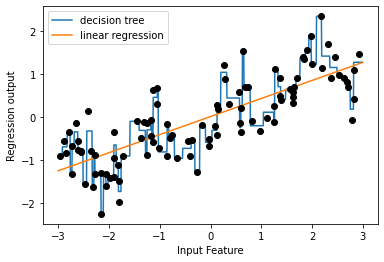

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
X,y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)
reg = DecisionTreeRegressor(min_samples_split=3).fit(X,y)
plt.plot(line,reg.predict(line),label='decision tree')
reg = LinearRegression().fit(X,y)
plt.plot(line, reg.predict(line),label="linear regression")
plt.plot(X[:,0],y,'o',c='k')
plt.ylabel("Regression output")
plt.xlabel("Input Feature")
plt.legend(loc="best")

one way to make linear models more powerful on continuous data is to use binning(also known as discretization) of the feature to split it up into multiple features, as described here.

In [11]:
bins = np.linspace(-3,3,11)
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [12]:
which_bin = np.digitize(X,bins=bins)
print("\nData points:\n",X[:5])
print("\nBin membership for data points: \n",which_bin[:5])


Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points: 
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [13]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [14]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


Text(0.5, 0, 'Input feature')

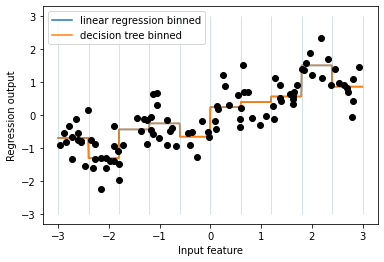

In [15]:
line_binned = encoder.transform(np.digitize(line,bins=bins))
reg = LinearRegression().fit(X_binned,y)
plt.plot(line,reg.predict(line_binned),label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned,y)
plt.plot(line,reg.predict(line_binned),label='decision tree binned')
plt.plot(X[:,0],y,'o',c='k')
plt.vlines(bins,-3,3,linewidth=1,alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

If there are good reasons to use a linear model for a particular datast-say, because it is very large and high-dimensional, but some features have nonlinear relations with the output- binning can be a great way to increase modeling power.

# Interactions and Polynomials

In [16]:
X_combined = np.hstack([X,X_binned])
print(X_combined.shape)

(100, 11)


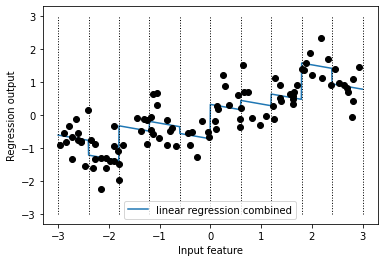

In [17]:
reg = LinearRegression().fit(X_combined,y)
line_combined = np.hstack([line,line_binned])
plt.plot(line,reg.predict(line_combined),label="linear regression combined")
for bin in bins:
    plt.plot([bin,bin],[-3,3],':',c='k',linewidth=1)
plt.legend(loc='best')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:,0],y,'o',c='k')

same slope is shared across all bins

In [18]:
X_product = np.hstack([X_binned,X*X_binned])
print(X_product.shape)

(100, 20)


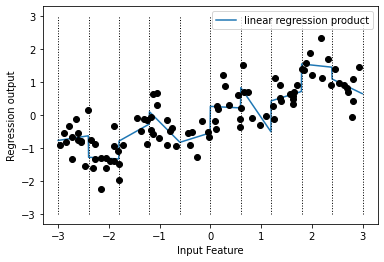

In [19]:
reg = LinearRegression().fit(X_product,y)
line_product = np.hstack([line_binned,line*line_binned])
plt.plot(line,reg.predict(line_product),label='linear regression product')
for bin in bins:
    plt.plot([bin,bin],[-3,3],':',c='k',linewidth=1)
plt.plot(X[:,0],y,'o',c='k')
plt.ylabel("Regression output")
plt.xlabel("Input Feature")
plt.legend(loc="best")

Using binning is one way to expand a continuous feature. Another one is to use polynomials of the original features. For a given feature x, we might want to consider x**2,x**3,x**4, and so on. This is implemented in PolynomialFeatures in the preprocessing module:


In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [21]:
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (100, 10)


In [22]:
X_poly[1]

array([2.70428584e+00, 7.31316190e+00, 1.97768801e+01, 5.34823369e+01,
       1.44631526e+02, 3.91124988e+02, 1.05771377e+03, 2.86036036e+03,
       7.73523202e+03, 2.09182784e+04])

In [23]:
X[1]

array([2.70428584])

In [24]:
print("Polynomial feature names: \n{}".format(poly.get_feature_names()))

Polynomial feature names: 
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


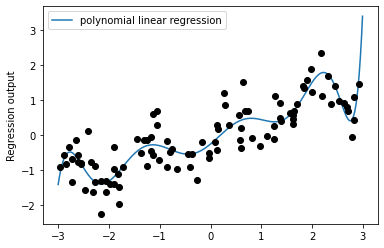

In [25]:
reg = LinearRegression().fit(X_poly,y)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:,0],y,'o',c='k')
plt.ylabel("Regression output")
plt.legend(loc="best")

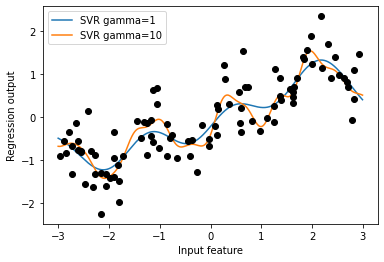

In [26]:
from sklearn.svm import SVR
for gamma in [1,10]:
    svr = SVR(gamma = gamma).fit(X,y)
    plt.plot(line,svr.predict(line),label='SVR gamma={}'.format(gamma))
plt.plot(X[:,0],y,'o',c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

# Boston Housing Dataset

In [27]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train,y_test = train_test_split(boston.data,boston.target,random_state=0)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.fit_transform(X_test)

In [28]:
X_train_scaled[1]

array([0.00108981, 0.25      , 0.17118768, 0.        , 0.1399177 ,
       0.45334355, 0.45623069, 0.52571606, 0.30434783, 0.1851145 ,
       0.75531915, 1.        , 0.21248227])

In [29]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)

In [30]:
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
X_train_poly.shape

(379, 105)

In [31]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x1 x11',
 'x1 x12',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x2 x10',
 'x2 x11',
 'x2 x12',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x3 x9',
 'x3 x10',
 'x3 x11',
 'x3 x12',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x4 x9',
 'x4 x10',
 'x4 x11',
 'x4 x12',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x5 x9',
 'x5 x10',
 'x5 x11',
 'x5 x12',
 'x6^2',
 'x6 x7',
 'x6 x8',
 'x6 x9',
 'x6 x10',
 'x6 x11',
 'x6 x12',
 'x7^2',
 'x7 x8',
 'x7 x9',
 'x7 x10',
 'x7 x11',
 'x7 x12',
 'x8^2',
 'x8 x9',
 'x8 x10',
 'x8 x11',
 'x8 x12',
 'x9^2',
 'x9 x10',
 'x9 x11',
 'x9 x12',
 'x10^2',
 'x10 x11',
 'x10 x1

In [32]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled,y_train)
print("Score without interactions: {:.3f}".format(ridge.score(X_test_scaled,y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(ridge.score(X_test_poly,y_test)))

Score without interactions: 0.577
Score with interactions: 0.741


In [33]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled,y_train)
print("Score without interactions: {:.3f}".format(rf.score(X_test_scaled,y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly,y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly,y_test)))

Score without interactions: 0.773
Score with interactions: 0.756


# Univariate Nonlinear Transformations

we just saw that adding squared or cubed featues can help linear models for regression. There are other transformations that often prove useful for transforming certain features: in particular, applying mathematical functions like log , exp, or sin. While tree based models only care about the ordering of the fearures, linear models and neural networks are very tied to the scale and distribution of each feature, and if there is a nonlinear relation between the feature and the target, that becomes hard to model- particularly in regression. The function log and exp can help by adjusting the relative scale in the data so that they can be captured better by a linear model or neural network.
The sin and cos functions can come in handy when dealing with data that encodes periodic patterns.

In [34]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))
w = rnd.normal(size = 3)
X = rnd.poisson(10*np.exp(X_org))
y = np.dot(X_org, w)

In [35]:
print("Number of feature appearances: \n{}".format(np.bincount(X[:,0])))

Number of feature appearances: 
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'Value')

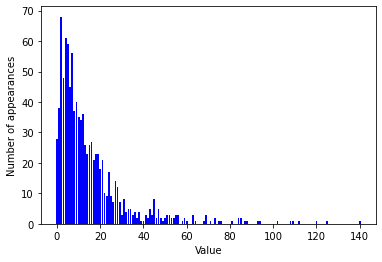

In [36]:
bins = np.bincount(X[:,0])
plt.bar(range(len(bins)),bins,color='b')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

Features X[:,1] and X[:,2] have similar properties. This kind of distribution of values (many small ones and a few very large ones) is very common in practice. However, it is something most linear models can't handle very well. Let's try to fit a ridge regression to this model:

In [37]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=0)
score = Ridge().fit(X_train,y_train).score(X_test,y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


As we can see from the relatively low R2 score, Ridge was not able to really capture the relationship between X and y. Applying a logarithmic transformation can help, though. Because the value 0 appears in the data( and log(0) is not defined), we cant actually just apply log. We have to comput log(x+1)

In [38]:
X_train_log = np.log(X_train+1)
X_test_log = np.log(X_test+1)

Text(0.5, 0, 'Value')

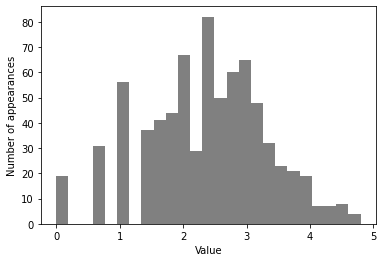

In [39]:
plt.hist(X_train_log[:,0],bins=25,color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [40]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log,y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


# Automatic Feature Selection

With so many ways to create new features, you might get tempted to increase the dimensionality of the data way beyond the number of original features. However adding more features makes all models more complex, and so increases the chance of overfitting. When adding new features, or with high-dimensional datasets in general, it can be a good idea to reduce the number of features to only the most useful ones, and discard the rest. This can lead to simpler models that can generalize better.But how can you know how good each feature is? There are three basic strategies: univariate statistics, model-based selection, and iterative selection. 

## Univariate Statistics

In univariate statistics we compute whether there is a statistically significant relationship between each feature and the target. Then the features that are related with the highest confidence are selected. In the case of classification, this is also known as analysis of variance (ANOVA). A key property of these tests is that they are univariate, meaning that they only consider each feature individually. Consequently, a feature will be discarded if it is only informative when combined with another feature. Univariate test are often very fast to compute, and don't require building a model. On the other hand, they are completely independent of the model that you might want to apply after the feature selection.

To use univariate feature selection in sklearn, you need to choose a test, usually either f-classif for classification or f-regression for regression, and a method to discard features based on p-values determined in the test. All methods for discarding parameters use a threshold to discard all features with too high a p-value. The methods differ in how they compute this threshold, with the simplest ones being SelectKBest, which selects a fixed number of k of features, and SelectPercentile, which selects a fixed percentage of features. Let's apply the feature selection for classification on the cancer dataset.

In [41]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data),50))
X_w_noise = np.hstack([cancer.data,noise])
X_train,X_test,y_train,y_test = train_test_split(X_w_noise,cancer.target,random_state=0,test_size=.5)
select = SelectPercentile(percentile=50)
select.fit(X_train,y_train)
X_train_selected = select.transform(X_train)

In [42]:
print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


In [43]:
mask = select.get_support()
print(mask)

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([], [])

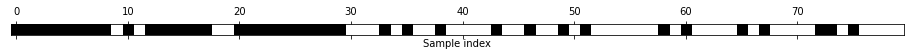

In [44]:
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [45]:
from sklearn.linear_model import LogisticRegression
X_test_selected = select.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train,y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test,y_test)))
lr.fit(X_train_selected,y_train)
print("Score with only selected features: {:.3f}".format(lr.score(X_test_selected,y_test)))

Score with all features: 0.919
Score with only selected features: 0.909


C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

# Model-Based Feature Selection

Model based feature selection uses a supervised machine learning model to judge the importance of each feature, and keeps only the most important ones. The supervised model that is used for feature selection doesn't need to be the same model that is used for the final supervised modeling.The feature selection model needs to provide some measure of importance for each feature, so that they can be ranked by their measure.

In [46]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100,random_state=42),
    threshold="median"
    )

In [47]:
select.fit(X_train,y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


([], [])

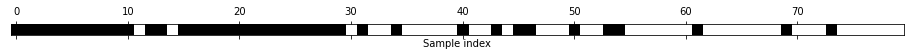

In [48]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [49]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1,y_train).score(X_test_l1,y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.930


C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Iterative Feature Selection

In Univariate testing we used no model, in model based selection we used a single model to select features. In iterative feature selection, a series of models are built, with varying numbers of features. There are two basic methods: starting with no features and adding features one by one until some stopping criterion is reached, or starting with all features and removing features one by one until some stopping criterion is reached. 

### Recursive Feature Elimination(RFE)

([], [])

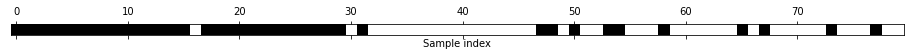

In [50]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
select.fit(X_train,y_train)
mask = select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [51]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

In [52]:
score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe,y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.930


C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
print("Test score: {:.3f}".format(select.score(X_test,y_test)))

Test score: 0.951


# Bike Rental Problem

In New york, Citi bike operates  a network of bicycle rental stations with a subscription system. The stations are all over the city and provide a convenient way to get around. Bike rental data is made public in an anonymized form and has been analyzed in various ways.  The task we want to solve is to predict for a given time and day how many people will rent a bike in front of Andreas's house - so he knows if any bike will be left for him.

In [55]:
citibike = mglearn.datasets.load_citibike()

In [56]:
print("Citi bike data: \n{}".format(citibike.head()))

Citi bike data: 
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0, 0.5, 'Rentals')

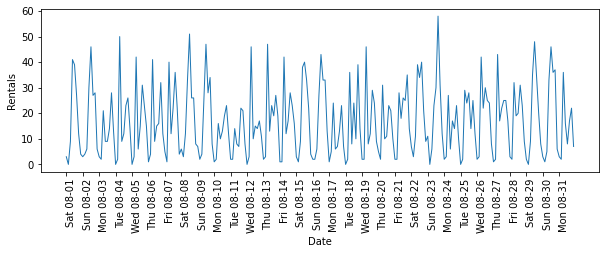

In [58]:
plt.figure(figsize=(10,3))
xticks = pd.date_range(start=citibike.index.min(), end = citibike.index.max(), freq='D')
plt.xticks(xticks,xticks.strftime("%a %m-%d"), rotation=90,ha="left")
plt.plot(citibike,linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

In [60]:
y = citibike.values
X=citibike.index.astype("int64").values.reshape(-1,1)

In [61]:
y

array([ 3,  0,  9, 41, 39, 27, 12,  4,  3,  4,  6, 30, 46, 27, 28,  6,  3,
        2, 21,  9,  9, 14, 28, 13,  0,  2, 50,  9, 12, 23, 26, 14,  0,  3,
       42,  6, 15, 31, 23, 15,  1,  4, 41,  9, 15, 16, 32, 12,  5,  1, 40,
       12, 22, 36, 22,  4,  6,  3, 12, 33, 51, 26, 26,  8,  7,  2,  4, 26,
       47, 28, 34,  8,  1,  2, 16, 10, 13, 19, 23, 12,  2,  2, 14,  8,  7,
       22, 21,  8,  0,  3, 46, 10, 15, 14, 17, 11,  2,  3, 47, 13, 23, 19,
       27, 19,  1,  1, 42, 12, 17, 28, 23, 16,  3,  1,  9, 38, 40, 33, 22,
        4,  2,  2,  6, 27, 43, 33, 33, 13,  1,  5, 24,  6,  7, 13, 23,  7,
        0,  2, 36,  8, 24, 10, 39, 14,  2,  2, 46,  8, 12, 29, 24,  9,  5,
        2, 31, 10, 11, 23, 21, 10,  2,  2, 28, 18, 26, 25, 35, 14,  7,  3,
       11, 39, 34, 40, 21,  9, 11,  0,  6, 23, 30, 58, 31, 12,  2,  3, 27,
        6, 17, 14, 23, 10,  0,  2, 29, 24, 28, 14, 25, 12,  2,  3, 42, 22,
       30, 25, 24,  8,  1,  2, 43, 17, 22, 25, 25, 17,  3,  2, 32, 19, 20,
       31, 23,  9,  2,  0

In [62]:
X

array([[1438387200000000000],
       [1438398000000000000],
       [1438408800000000000],
       [1438419600000000000],
       [1438430400000000000],
       [1438441200000000000],
       [1438452000000000000],
       [1438462800000000000],
       [1438473600000000000],
       [1438484400000000000],
       [1438495200000000000],
       [1438506000000000000],
       [1438516800000000000],
       [1438527600000000000],
       [1438538400000000000],
       [1438549200000000000],
       [1438560000000000000],
       [1438570800000000000],
       [1438581600000000000],
       [1438592400000000000],
       [1438603200000000000],
       [1438614000000000000],
       [1438624800000000000],
       [1438635600000000000],
       [1438646400000000000],
       [1438657200000000000],
       [1438668000000000000],
       [1438678800000000000],
       [1438689600000000000],
       [1438700400000000000],
       [1438711200000000000],
       [1438722000000000000],
       [1438732800000000000],
       [14

In [63]:
n_train = 184
def eval_on_features(features,target,regressor):
    X_train,X_test = features[:n_train],features[n_train:]
    y_train,y_test = target[:n_train],target[n_train:]
    regressor.fit(X_train,y_train)
    print("Test - set R^2: {:.2f}".format(regressor.score(X_test,y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10,3))
    
    plt.xticks(range(0,len(X),8), xticks.strftime("%a %m-%d"), rotation=90,ha="left")
    plt.plot(range(n_train),y_train,label="train")
    plt.plot(range(n_train,len(y_test)+n_train),y_test,'-',label="test")
    plt.plot(range(n_train),y_pred_train,'--',label="predict train")
    plt.plot(range(n_train,len(y_test) + n_train), y_pred,'--',label="prediction test")
    plt.legend(loc=(1.01,0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

Test - set R^2: -0.04


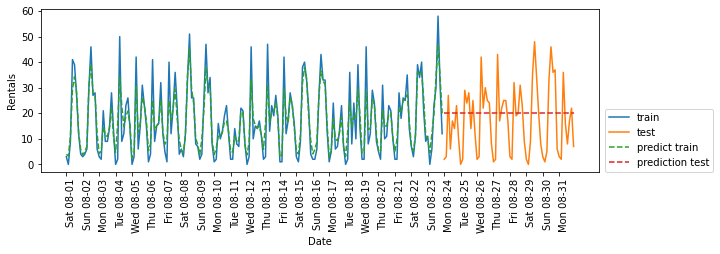

In [64]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,random_state=0)
eval_on_features(X,y,regressor)

From looking at the rental figures in the training data, two features seem to be very important: the time of day and the day of week. So, let's add these two features.

In [66]:
X_hour = citibike.index.hour.values.reshape(-1,1)
print(X_hour[:10])

[[ 0]
 [ 3]
 [ 6]
 [ 9]
 [12]
 [15]
 [18]
 [21]
 [ 0]
 [ 3]]


Test - set R^2: 0.60


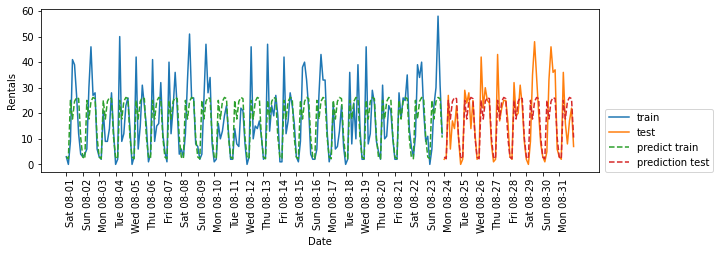

In [67]:
eval_on_features(X_hour,y,regressor)

Test - set R^2: 0.84


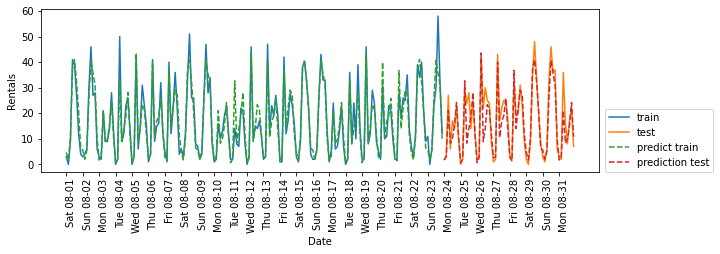

In [68]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1,1),
                        citibike.index.hour.values.reshape(-1,1)])
eval_on_features(X_hour_week,y,regressor)

Test - set R^2: 0.13


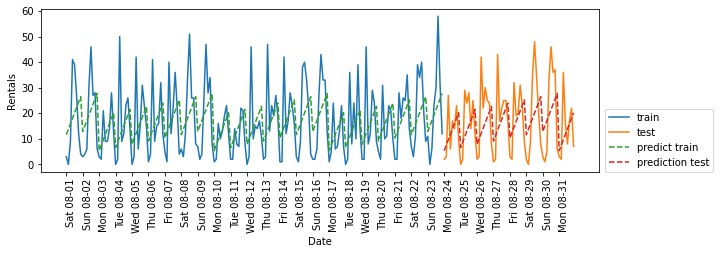

In [69]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week,y,LinearRegression())

In [70]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

Test - set R^2: 0.62


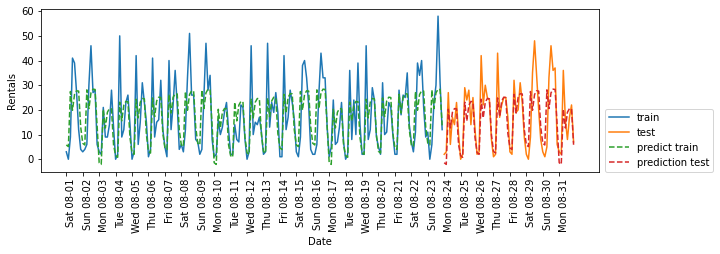

In [71]:
eval_on_features(X_hour_week_onehot,y,Ridge())

Test - set R^2: 0.85


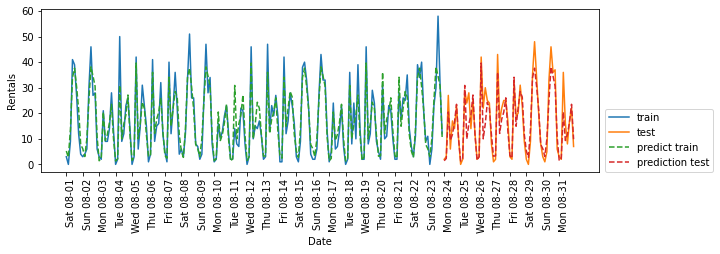

In [73]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only = True, include_bias = False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly,y,lr)

In [74]:
hour = ["%02d:00" % i for i in range(0,24,3)]
day = ["Mon", "Tue","Wed","Thu","Fri","Sat","Sun"]
features = day+hour

In [75]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_!=0]

Text(0, 0.5, 'Feature magnitude')

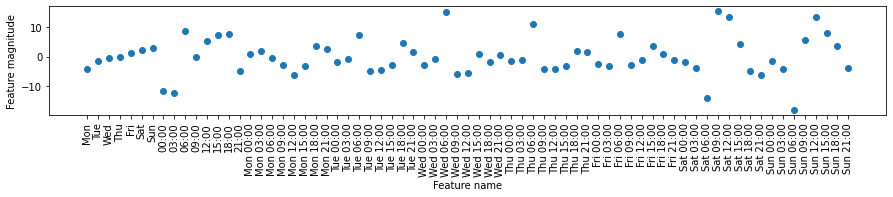

In [76]:
plt.figure(figsize=(15,2))
plt.plot(coef_nonzero,'o')
plt.xticks(np.arange(len(coef_nonzero)),features_nonzero,rotation=90)
plt.xlabel("Feature name")
plt.ylabel("Feature magnitude")